# Netflix Exploartory Data Analysis (EDA)

## Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\denis\OneDrive\Desktop\Personal Projects\netflix_project\raw_data\netflix_titles.csv")

## Exploring the Data Frame

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Identifying NaN

In [18]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Countries

In [6]:
country_count = df["country"].value_counts()

In [7]:
fntv_by_country = df["country"].value_counts(normalize = True) * 100

In [8]:
# % of films and TV produced by a country that is available on Netflix (2008 - 2021)
print(fntv_by_country)

country
United States                                    35.330993
India                                            12.186560
United Kingdom                                    5.253260
Japan                                             3.071715
South Korea                                       2.494985
                                                   ...    
Russia, Spain                                     0.012538
Croatia, Slovenia, Serbia, Montenegro             0.012538
Japan, Canada                                     0.012538
United States, France, South Korea, Indonesia     0.012538
United Arab Emirates, Jordan                      0.012538
Name: proportion, Length: 748, dtype: float64


plt test

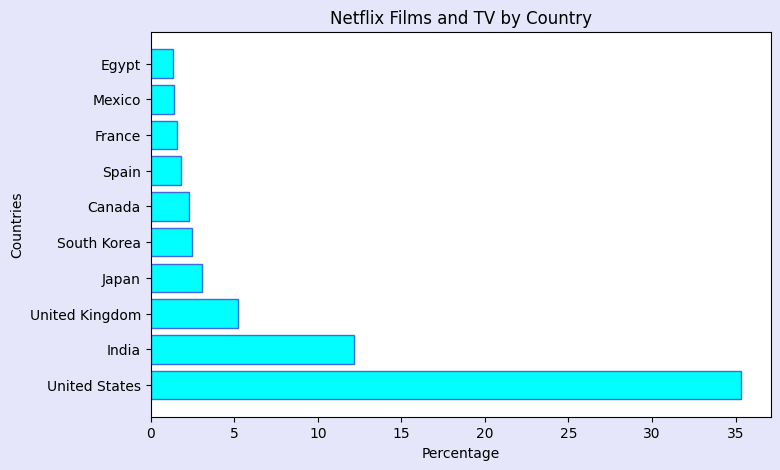

In [9]:
top_10 = fntv_by_country.head(10)
plt.figure(figsize = (8,5), facecolor = "lavender")
plt.barh(top_10.index, top_10.values, color = 'cyan', edgecolor = "royalblue")
plt.xlabel("Percentage")
plt.ylabel("Countries")
plt.title("Netflix Films and TV by Country")
plt.show()


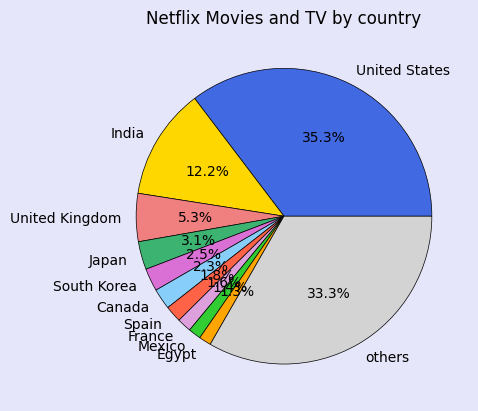

In [10]:
top_10c = fntv_by_country.head(10)
other_c = fntv_by_country.iloc[10:].sum()
top_10c["others"] = other_c
plt.figure(facecolor="lavender")
plt.pie(top_10c.values, labels=top_10c.index, autopct="%1.1f%%", colors = [
    'royalblue', 'gold', 'lightcoral', 'mediumseagreen', 'orchid',
    'lightskyblue', 'tomato', 'plum', 'limegreen', 'orange',
    'lightgray'
], wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Netflix Movies and TV by country")
plt.show()

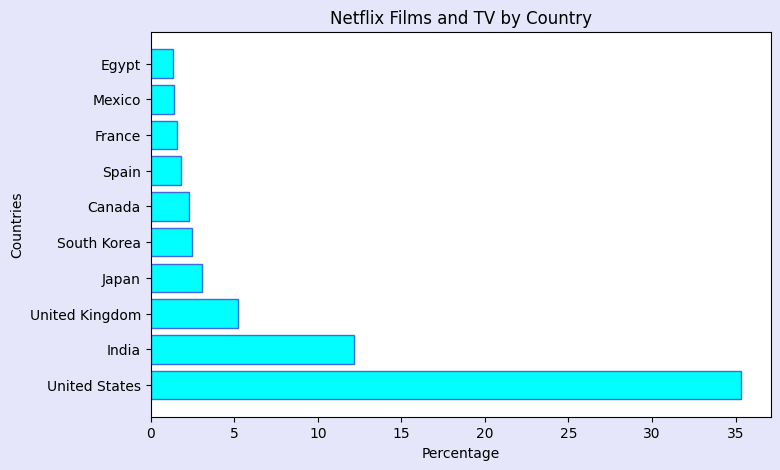

In [11]:
top_10 = fntv_by_country.head(10)
plt.figure(figsize = (8,5), facecolor = "lavender")
plt.barh(top_10.index, top_10.values, color = 'cyan', edgecolor = "royalblue")
plt.xlabel("Percentage")
plt.ylabel("Countries")
plt.title("Netflix Films and TV by Country")
plt.show()

director analysis

In [12]:
num_of_fntv_by_dir=df["director"].value_counts()
print(num_of_fntv_by_dir)

director
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Marcus Raboy               16
Suhas Kadav                16
Jay Karas                  14
                           ..
Mu Chu                      1
Chandra Prakash Dwivedi     1
Majid Al Ansari             1
Peter Hewitt                1
Paul Raschid                1
Name: count, Length: 4528, dtype: int64


% of films by a director

In [13]:
fntv_by_dir = df["director"].value_counts(normalize=True) * 100
print(fntv_by_dir)

director
Rajiv Chilaka              0.307792
Raúl Campos, Jan Suter     0.291592
Marcus Raboy               0.259193
Suhas Kadav                0.259193
Jay Karas                  0.226794
                             ...   
Mu Chu                     0.016200
Chandra Prakash Dwivedi    0.016200
Majid Al Ansari            0.016200
Peter Hewitt               0.016200
Paul Raschid               0.016200
Name: proportion, Length: 4528, dtype: float64


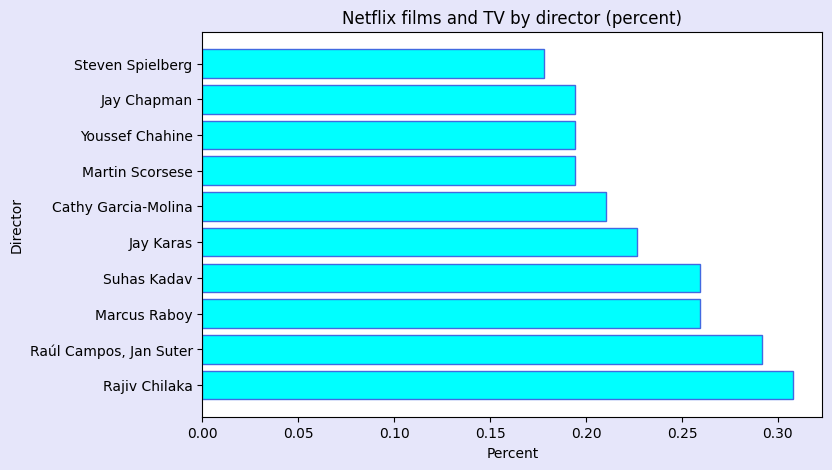

In [14]:
top10d = fntv_by_dir.head(10)

plt.figure(figsize = (8,5), facecolor="lavender")
plt.barh(top10d.index, top10d.values, color="cyan", edgecolor="royalblue")
plt.xlabel("Percent")
plt.ylabel("Director")
plt.title("Netflix films and TV by director (percent)")
plt.show()

number of films by director

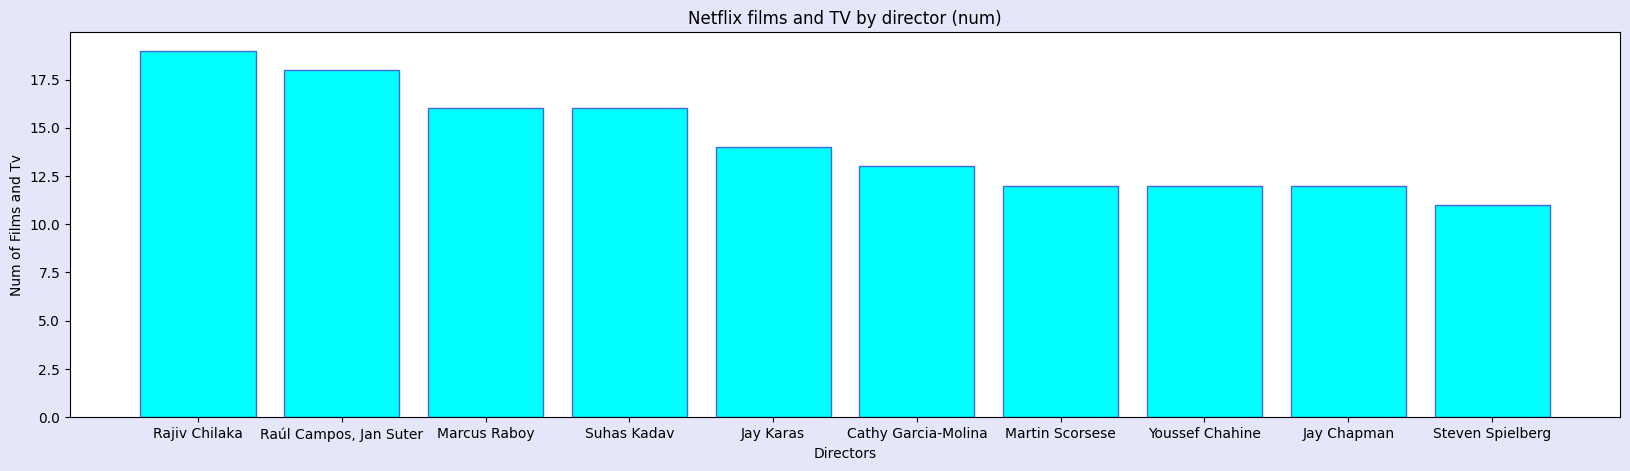

In [15]:
top10fpd = num_of_fntv_by_dir.head(10)

plt.figure(figsize = (20,5), facecolor="lavender")
plt.bar(top10fpd.index, top10fpd.values, color="cyan", edgecolor="royalblue")
plt.xlabel("Directors")
plt.ylabel("Num of Films and Tv")
plt.title("Netflix films and TV by director (num)")
plt.show()